In [22]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
from scipy.ndimage import interpolation as inter

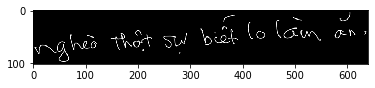

In [30]:
input_file = 'data/VNOnDB/line/test_line/20151208_0146_7105_2_tg_0_7.png'
input_file = 'data/VNOnDB/line/test_line/20151208_0146_7105_1_tg_2_7.png'

img = Image.open(input_file).convert('L')

bin_img = ImageOps.invert(img)
plt.imshow(bin_img, cmap='gray')

Best angle: -3


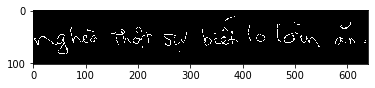

In [20]:
def find_score(arr, angle):
    data = inter.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score


delta = 1
limit = 5
angles = np.arange(-limit, limit+delta, delta)
scores = []
for angle in angles:
    hist, score = find_score(bin_img, angle)
    scores.append(score)

best_score = max(scores)
best_angle = angles[scores.index(best_score)]
print('Best angle: {}'.format(best_angle))

# correct skew
data = inter.rotate(bin_img, best_angle, reshape=False, order=0)
img = im.fromarray((255 * data).astype("uint8")).convert("RGB")
plt.imshow(img)
# img.save('skew_corrected.png')